# DESAFIO 1

## Paso 1. Abrir el dataset SATscore2015.csv. Investigar la estructura de los datos y responder

### 1. ¿Qué es lo que describen los datos?

El SAT score es un examen estandarizado dirigido a alumnos de 2ª, 3ª y 4ª año de bachirelato.
El objetivo es evaluar las habilidades en la preparación de los estudiantes para la Universidad.
Las características más importantes es dar énfasis en Matemáticas y Comprensión de Lenguaje.
El SAT es desarrollado, publicado y de propiedad de College Board. Fuente: http://www.collegeboard.org



** La estructura de los datos es la siguiente:**
columna: Mathematic
columna: Writing
columna: Reading
Ensayo (iincluido en el puntaje de Writing)
Cada una de las secciones tienen un rango de puntaje entre 200 a 800 puntos teniendo, por lo tanto, una puntuación máxima de 2400 puntos.
El tiempo límite para resolver el exámen es de 3.45hs.

** El archvio contiene las siguientes columnas:**
columna: State
columna: Mathematic
columna: Writing
columna: Total SAT score

### 2. ¿Se ve algún problema en los datos? ¿Están completos?

Se encontró que para el estado de Virgina el puntaje correspondiente a Mathematic existía un missing string value
Por otra parte se encontró que el puntaje en Writing (842) para el estado de Pennsylvania era superior al límite máximo mencionado anteriormente.

### 3. ¿Qué representan las filas? ¿Y las columnas?

Las filas representan los Estados y las columnas representan el puntaje promedio correspondiente a Mathematic, Writing y el Total SAT score representa la sumatoria de los puntajes de cada columna (tener en cuenta que el archivo de a trabajo para el Desafío 1 no incluye los datos correspondientes a la columna Reading)

### 4. Creá un diccionario de datos para el dataset en formato texto. En el mismo deben describirse las diferentes variables, su nivel de medición y dar alguna(s) medida(s) descriptiva(s) de cada una.

In [1]:
dict = {'State':'SATscore[0]','Mathematics':{'media':'np.mean(SATscore[1])','median':'np.median(SATscore[1])','varianza':'np.var(SATscore[1])','desvio std':'np.std(SATscore[1])'},'Writing':{'media':'np.mean(SATscore[2])','median':'np.median(SATscore[2])','varianza':'np.var(SATscore[2])','desvio std':'np.std(SATscore[2])'},'TotalSAT':{'media':'np.mean(SATscore[2])','median':'np.median(SATscore[2])','varianza':'np.var(SATscore[2])','desvio std':'np.std(SATscore[2])'}}
dict

{'Mathematics': {'desvio std': 'np.std(SATscore[1])',
  'media': 'np.mean(SATscore[1])',
  'median': 'np.median(SATscore[1])',
  'varianza': 'np.var(SATscore[1])'},
 'State': 'SATscore[0]',
 'TotalSAT': {'desvio std': 'np.std(SATscore[2])',
  'media': 'np.mean(SATscore[2])',
  'median': 'np.median(SATscore[2])',
  'varianza': 'np.var(SATscore[2])'},
 'Writing': {'desvio std': 'np.std(SATscore[2])',
  'media': 'np.mean(SATscore[2])',
  'median': 'np.median(SATscore[2])',
  'varianza': 'np.var(SATscore[2])'}}

## Paso 2. Cargar el dataset

### 5. Cargá los datos en una lista de listas

In [2]:
import pandas as pd
import numpy as np

SAT = pd.read_csv('C:/Users/gonza/Desktop/Desafio 1/Data/SATscore2015.csv')
SATscore = [[SAT['State'],SAT['Mathematics'],SAT['Writing'],SAT['Total SAT score']]]

type (SATscore)

list

### 6. Visualizá (print) los datos

In [3]:
print(SATscore)

[[0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma

### 7. Extraé una lista de las etiquetas de los datos y removela del dataset

In [4]:
SATscore[0]

[0                  Alabama
 1                   Alaska
 2                  Arizona
 3                 Arkansas
 4               California
 5                 Colorado
 6              Connecticut
 7                 Delaware
 8     District of Columbia
 9                  Florida
 10                 Georgia
 11                  Hawaii
 12                   Idaho
 13                Illinois
 14                 Indiana
 15                    Iowa
 16                  Kansas
 17                Kentucky
 18               Louisiana
 19                   Maine
 20                Maryland
 21           Massachusetts
 22                Michigan
 23               Minnesota
 24             Mississippi
 25                Missouri
 26                 Montana
 27                Nebraska
 28                  Nevada
 29           New Hampshire
 30              New Jersey
 31              New Mexico
 32                New York
 33          North Carolina
 34            North Dakota
 35                 

### 8. Creá una lista con los nombres de los Estados del dataset. (Pista: usá la lista de etiquetas como índice)

In [5]:
Estados = SATscore[0][0]
Estados

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New Hampshire
30              New Jersey
31              New Mexico
32                New York
33          North Carolina
34            North Dakota
35                    Ohio
36                Oklahoma
3

### 9. Imprimí los tipos de cada columna

In [6]:
SAT.dtypes

State              object
Mathematics        object
Writing             int64
Total SAT score     int64
dtype: object

### 10. ¿Hay algún tipo que deba ser cambiado? Si es así, transformalo al tipo que corresponde

Si, el string (".") transformó a la columna Mathematics en type = object. Debemos transformar la columna como numérica

In [7]:
SAT.Mathematics= pd.to_numeric(SAT['Mathematics'], errors='coerse')
SAT.dtypes


State               object
Mathematics        float64
Writing              int64
Total SAT score      int64
dtype: object

In [8]:
# RECORDAR PORQUE

# Reemplazamos por el valor encontrado
SAT['Mathematics'] = SAT['Mathematics'].replace(np.nan, 519)
SAT['Writing'] = SAT['Writing'].replace(842, 482)


### 11. Creá un diccionario que contenga el nombre de cada estado (llave) y una enumeración ordenada de los valores de cada columna (valor)
La idea aquí es que puedan recuperar los valores del SAT de cada estado a partir de identificar su código o nombre completo como referencia.

In [10]:
SAT.set_index('State').T.to_dict('list')

{'Alabama': [538.0, 533.0, 1616.0],
 'Alaska': [503.0, 482.0, 1494.0],
 'Arizona': [527.0, 502.0, 1552.0],
 'Arkansas': [569.0, 551.0, 1688.0],
 'California': [506.0, 491.0, 1492.0],
 'Colorado': [587.0, 567.0, 1736.0],
 'Connecticut': [506.0, 504.0, 1514.0],
 'Delaware': [461.0, 445.0, 1368.0],
 'District of Columbia': [440.0, 432.0, 1313.0],
 'Florida': [480.0, 468.0, 1434.0],
 'Georgia': [485.0, 475.0, 1450.0],
 'Hawaii': [508.0, 477.0, 1472.0],
 'Idaho': [463.0, 442.0, 1372.0],
 'Illinois': [616.0, 587.0, 1802.0],
 'Indiana': [499.0, 478.0, 1473.0],
 'Iowa': [600.0, 566.0, 1755.0],
 'Kansas': [592.0, 568.0, 1748.0],
 'Kentucky': [587.0, 574.0, 1749.0],
 'Louisiana': [559.0, 553.0, 1675.0],
 'Maine': [473.0, 451.0, 1392.0],
 'Maryland': [493.0, 478.0, 1462.0],
 'Massachusetts': [529.0, 507.0, 1552.0],
 'Michigan': [609.0, 585.0, 1788.0],
 'Minnesota': [607.0, 576.0, 1778.0],
 'Mississippi': [563.0, 570.0, 1713.0],
 'Missouri': [599.0, 582.0, 1777.0],
 'Montana': [556.0, 538.0, 1655.

### 12. Creá un diccionario para cada una de las columnas numéricas
Aquí es necesario crear un diccionario por cada columna con valores numéricos, de forma independiente.

In [11]:
dict_math = {'Mathematics':SAT['Mathematics']}
dict_writing = {'Writing':SAT['Writing']}
dict_total = {'Total':SAT['Total SAT score']}

print(dict_math)
print(dict_writing)
print(dict_total)

{'Mathematics': 0     538.0
1     503.0
2     527.0
3     569.0
4     506.0
5     587.0
6     506.0
7     461.0
8     440.0
9     480.0
10    485.0
11    508.0
12    463.0
13    616.0
14    499.0
15    600.0
16    592.0
17    587.0
18    559.0
19    473.0
20    493.0
21    529.0
22    609.0
23    607.0
24    563.0
25    599.0
26    556.0
27    590.0
28    494.0
29    530.0
30    521.0
31    544.0
32    502.0
33    504.0
34    608.0
35    563.0
36    569.0
37    521.0
38    504.0
39    450.0
40    494.0
41    487.0
42    597.0
43    574.0
44    486.0
45    575.0
46    524.0
47    519.0
48    388.0
49    510.0
50    497.0
51    605.0
52    586.0
Name: Mathematics, dtype: float64}
{'Writing': 0     533
1     482
2     502
3     551
4     491
5     567
6     504
7     445
8     432
9     468
10    475
11    477
12    442
13    587
14    478
15    566
16    568
17    574
18    553
19    451
20    478
21    507
22    585
23    576
24    570
25    582
26    538
27    576
28    470
29    511
3

## Paso 3. Describir los datos

### 13. Imprimí el máximo y el mínimo de cada columna

In [12]:
columns_names = SAT.columns.values[1:]

for names in columns_names:
    maximo = np.max(SAT[names],axis=0)
    minimo = np.min(SAT[names],axis=0)
    print ('El valor máximo de ' ,names, 'es de: ', maximo)
    print ('El valor minimo de ' ,names, 'es de: ', minimo)
    
    

#np.max(SAT['Mathematics'],axis=0)

El valor máximo de  Mathematics es de:  616.0
El valor minimo de  Mathematics es de:  388.0
El valor máximo de  Writing es de:  587
El valor minimo de  Writing es de:  412
El valor máximo de  Total SAT score es de:  1802
El valor minimo de  Total SAT score es de:  1214


### 14. Escribí una función que use solo lists comprehensions (no for loops) para calcular el Desvío Estándar
Imprimí el Desvío Estándar de cada columna numérica.

In [13]:
# Mathematics
datos_std = SAT.drop('State',axis=1)
datos_std_math = pd.to_numeric(SAT['Mathematics'],errors='coerce')

std_math = np.std([d for d in datos_std_math])

# Writing
datos_std = SAT.drop('State',axis=1)
datos_std_write = pd.to_numeric(SAT['Writing'],errors='coerce')

std_write = np.std([d for d in datos_std_write])

# Total SAT score
datos_std = SAT.drop('State',axis=1)
datos_std_score = pd.to_numeric(SAT['Total SAT score'],errors='coerce')

std_score = np.std([d for d in datos_std_score])

print('La desviación estándar para Mathematics es: ',std_math)
print('La desviación estándar para Writing es: ',std_write)
print('La desviación estándar para Total SAT score es: ',std_score)

La desviación estándar para Mathematics es:  51.38808707334831
La desviación estándar para Writing es:  47.71827553322438
La desviación estándar para Total SAT score es:  147.3028015468091


## Paso 4. Visualizar los datos

### 15. Usando MatPlotLib y PyPlot, graficá la distribución del *Total*. ¿Qué tipo de gráfico le correspondería? ¿Por qué?

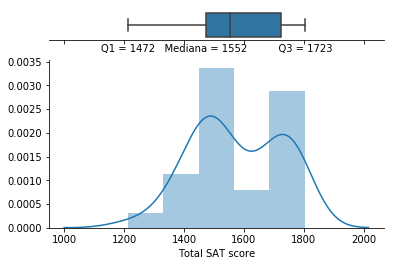

In [34]:
# Se importará las librerias.
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Importamos la librería seaborn
import seaborn as sns

# Generamos dos ventanas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Colocamos un gráfico en cada parte
sns.boxplot(SAT['Total SAT score'], ax=ax_box)
sns.distplot(SAT['Total SAT score'], ax=ax_hist)
 
# Cambio el x axis
ax_box.set(xlabel='Q1 = 1472   Mediana = 1552          Q3 = 1723')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Para mostrar la distribución de la variable "Total SAT score" la opción usual es un histograma.
Los histogramas indican qué forma toma la distribución de frecuencias de una variable. Para el ejemplo es válido suponer la ausencia de normalidad.
Se puede expresar que es posible interpretar como una distribución con doble pico y valle en el centro, lo cual sugiere la posibilidad de un esquema de estratificación.  

Se adiciona para mayor información un boxplot, que al igual que el histograma, muestra una asimetría hacia la izquierda.  Como puede observarse la distancia del bigote izquierda supera con creces a la del derecho, en valores la distancia cercana a 1200 hasta 1472, es mayor que la de 1723 a la cercana a 1800.  También puede expresarse la posible inexistencias de posibles valores atípicos al no existir ningún punto posterior a la terminación del vigote.


### 16. Graficá la distribución de la variable *Math*

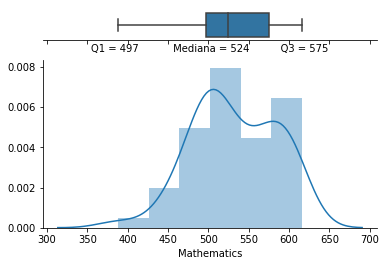

In [35]:
# Importamos la librería seaborn
import seaborn as sns

# Generamos dos ventanas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Colocamos un gráfico en cada parte
sns.boxplot(SAT['Mathematics'], ax=ax_box)
sns.distplot(SAT['Mathematics'], ax=ax_hist)
 
# Cambio el x axis
ax_box.set(xlabel='Q1 = 497           Mediana = 524          Q3 = 575')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

### 17. Graficá la distribución de la variable *Writing*

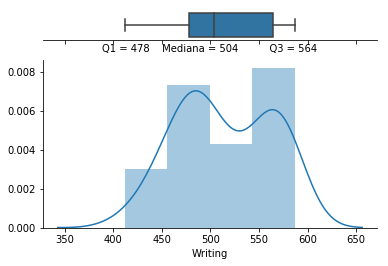

In [36]:
# Generamos dos ventanas
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Colocamos un gráfico en cada parte
sns.boxplot(SAT['Writing'], ax=ax_box)
sns.distplot(SAT['Writing'], ax=ax_hist)
 
# Cambio el x axis
ax_box.set(xlabel='Q1 = 478    Mediana = 504          Q3 = 564')


ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

### 18. ¿Cuál sería un supuesto acerca de la distribución que genera los datos?

Un supuesto usual es esperar la normalidad de los datos.

### 19. ¿Qué podrías decir de ese supuesto en relación a los datos analizados?

Tal como se expreso para Total SAT score, ninguna distribución se comporta como la normal.  La mayoría presenta una asimetria hacia la izquierda y una posible estratificación dada la apariencia de distribución heterogenea, de doble pico.

## BONUS: Complementá el análisis

### 20. Elegí fuentes de datos adicionales (pobreza, ingresos, población, migrantes, proporción de alumnos que rinden el examen en cada estado, etc.). Analiza y grafica los datos de forma conjunta para observar posibles relaciones. 
#### Pista: chequear consignas para ir a los links con datos

In [37]:
df = pd.read_csv('C:/Users/gonza/Desktop/Desafio 1/Data/df.csv', usecols=['State','Mathe2015','Writing2015','SATscore2015','GDP2016','Gini2015','density2015','pop2015','INMprop2016'])

**Total SAT score y GDP**

Para un primer análisis se realizará una correlación entre el rendimiento del SAT score general y datos de ingresos promedios de cada estado. 

In [38]:
import numpy as np
from scipy.stats.stats import pearsonr 
print("La matriz de correlación entre Total SAT score y GDP es :")
print(np.corrcoef(df['SATscore2015'],df['GDP2016']))
print("El cálculo del pearson entre Total SAT score y GDP es:", pearsonr(df['SATscore2015'],df['GDP2016']))

La matriz de correlación entre Total SAT score y GDP es :
[[ 1.         -0.13330258]
 [-0.13330258  1.        ]]
El cálculo del pearson entre Total SAT score y GDP es: (-0.13330258388713112, 0.3413138640422734)


Existe una correlación negativa entre las dos variables, mostrando que la dependencia es de -0.13, lo cual implica que la relación no es significativamente fuerte.

Los datos sugieren que la tendencia entre las dos variables no representan una significativa correlación, para tomar la decisión si afecta el rendimiento de los alumnos al tomar el test de SAT score.

**Total SAT score y Gini**

En una segunda instancia se analiza la correlacion entre los resultados del SAT score con la distribución del ingreso (índice de Gini):

La matriz de correlación entre Total SAT score y el Gini es :
[[ 1.         -0.32744112]
 [-0.32744112  1.        ]]
El cálculo del pearson entre Total SAT score y Gini es: (-0.3274411246696546, 0.016695083049833668)


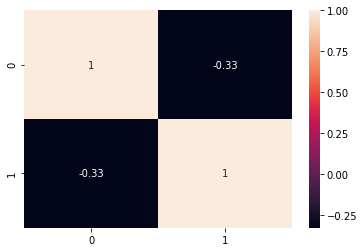

In [39]:
corr_score_gini = np.corrcoef(df['SATscore2015'],df['Gini2015'])
print("La matriz de correlación entre Total SAT score y el Gini es :")
print(corr_score_gini)
print("El cálculo del pearson entre Total SAT score y Gini es:", pearsonr(df['SATscore2015'],df['Gini2015']))

#Gráfico de correlación
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_score_gini,annot=True)
plt.show()

Existe una correlación negativa entre las dos variables, mostrando que la dependencia es de -0.33, lo cual implica que la relación es significativa.  Existiendo un antagonismo entre el test y la desigualdad con respecto al ingreso por estado.

**Total SAT score y densidad**

Se incluyo la variable densidad dada la posible relación con el resuldado del test:

**Justificación positiva:** Asumiendo que la población se incrementa por metro cuadrado, debería presentar mayor calidad educativa y el desarrollo de programas que ayuden a incrementar aptitudes.

**Justifiación negativa:** Se supone que a mayor densidad impulsaría un crecimiento posterior del PBI, en el transcurso de dicho período se genera una necesidad de auto sustentabilidad, con lo cual sugiere una busqueda de ingresos de los adolescentes y ésto podría afectar su rendimiento en el test.

Se realizará una correlación entre el rendimiento del SAT score general y la densidad:

La matriz de correlación entre Total SAT score y densidad es :
[[ 1.         -0.33011236]
 [-0.33011236  1.        ]]
El cálculo del pearson entre Total SAT score y densidad es: (-0.33011236032577135, 0.015776416814452732)


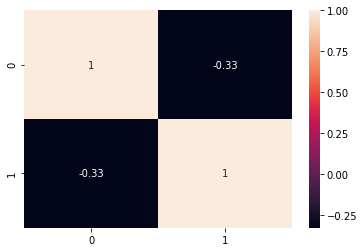

In [40]:
corr_score_density = np.corrcoef(df['SATscore2015'],df['density2015'])
print("La matriz de correlación entre Total SAT score y densidad es :")
print(corr_score_density)
print("El cálculo del pearson entre Total SAT score y densidad es:", pearsonr(df['SATscore2015'],df['density2015']))

#Gráfico de correlación
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_score_density,annot=True)
plt.show()

Existe una correlación negativa entre las dos variables, mostrando que la dependencia es de -0.33, lo cual implica que la relación es significativa.  Existiendo un antagonismo entre el test y la densidad poblacional de cada estado.  Se sugiere que la justificación negativa es probable.

**Total SAT score y proporción de inmigrantes por estado**

Se realizará una correlación entre el rendimiento del SAT score general y la proporción de inmigrantes:

La matriz de correlación entre Total SAT score y proporción de inmigrantes es :
[[ 1.         -0.37533311]
 [-0.37533311  1.        ]]
El cálculo del pearson entre Total SAT score y proporción de inmigrantes es: (-0.37533310546799076, 0.0056168390197624315)


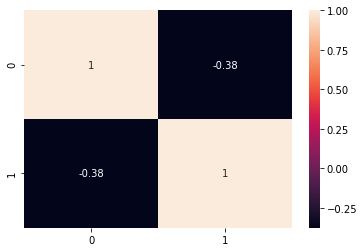

In [41]:
corr_score_migration = np.corrcoef(df['SATscore2015'],df['INMprop2016'])
print("La matriz de correlación entre Total SAT score y proporción de inmigrantes es :")
print(corr_score_migration)
print("El cálculo del pearson entre Total SAT score y proporción de inmigrantes es:", pearsonr(df['SATscore2015'],df['INMprop2016']))

#Gráfico de correlación
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_score_migration,annot=True)
plt.show()

Existe una correlación negativa entre las dos variables, mostrando que la dependencia es de -0.38, lo cual implica que la relación es significativa.  Existiendo un antagonismo entre el test y la densidad poblacional de cada estado.
La probable relación negativa se deba:

**1-** El lenguaje puede ser una barrera que no permita la comprensión de las preguntas del test.

**2-** El nivel de educación previo puede ser determinante debido al poco conocimiento y/o aptitudes.

**3-** La curricula educativa brindada en su país de origen puede diferir de la exigida en cada insititución de los estados americanos.

## Rendimiento en writing y en matemática en relación con la cantidad, la densidad de la población y la incidencia de migración en cada estado.##

Se realizará una matriz de correlación de doble entrada para la mejor representación y visualización de la interrelación de las variables.

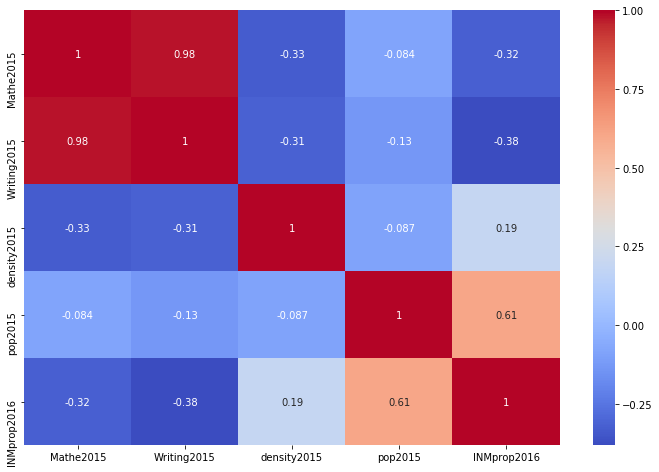

In [42]:
df_data = df[['Mathe2015','Writing2015','density2015','pop2015','INMprop2016']]

plt.figure(figsize=(12,8))
sns.heatmap(df_data.corr(),cmap='coolwarm',annot=True)

plt.show()

**Relación con Mathe2015:** Existe una correlación negativa significativa respecto a las variables de densidad de la población y proporción de inmigrantes.  Por otro lado, la relación con respecto a la población es no significativa.

**Relación con Writing2015:** Existe una correlación negativa significativa respecto a las variables de densidad de la población y proporción de inmigrantes.  Por otro lado, la relación con respecto a la población es no significativa.

### 21. A partir de las variables seleccionados, ¿observas una mayor incidencia de alguna de las variables y la performance del estado en alguno de los scores? ¿Consideras importante inferir alguna conclusión para orientar a los directivos de la universidad y/o profundizar el análisis?  

Las variables que poseen mayor significancia fueron: Gini, densidad e inmigración respecto a las secciones y al total del test SAT.  Las cuales presentaron correlación negativa.
Consideraría inferir la ubicación de la universidad basandonos en los resultados de las correlaciones.

In [43]:
df_data2 = df[['State','SATscore2015','Gini2015','density2015','INMprop2016']]

# Se guarda los nombres de las variables a crear los rankings
colN = df_data2.columns.values[1:]

# Corremos la función rank por columna
for column_name in colN:
    new_name = colN + '_rank'
    df_data2[new_name] = df_data2[colN].rank(ascending=0)

df_rank = df_data2.drop(colN, axis=1)


# Vamos a generar una suma solo de las variables que pide el desafío
df_rank['SATscore2015_rank'] = df_data2['SATscore2015_rank'].rank(ascending=1)
df_rank['Tot_rank'] = df_rank.sum(axis=1)
df_rank['Tot_ranking'] = df_rank['Tot_rank'].rank(ascending=1)

df_ranking = df_rank.sort_values(by=['Tot_ranking'])

df_ranking = df_ranking.reset_index(drop=True)

df_ranking

C:\Users\gonza\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


State  SATscore2015_rank  Gini2015_rank  density2015_rank  \
0               Illinois                1.0           14.5              15.0   
1          Massachusetts               26.5            7.0               5.0   
2             New Jersey               30.0           17.0               2.0   
3            Connecticut               31.0            4.0               7.0   
4             California               35.0            6.0              14.0   
5               New York               41.0            3.0              10.0   
6   District of Columbia               52.0            2.0               1.0   
7           Rhode Island               39.5            9.0               4.0   
8                Florida               46.0            9.0              11.0   
9              Tennessee               14.0           11.0              23.0   
10              Michigan                3.0           31.5              21.0   
11              Virginia               29.0           26.0              17.0   
12                 Texas               47.0            9.0              29.0   
13             Louisiana               19.0            5.0              26.0   
14               Georgia               44.0           12.0              20.0   
15             Minnesota                4.0           37.5              33.0   
16     US Virgin Islands               53.0           13.0               6.0   
17        North Carolina               37.0           19.0              18.0   
18              Maryland               42.0           40.5               8.0   
19          Pennsylvania               36.0           22.5              12.0   
20               Arizona               26.5           24.0              36.0   
21              Kentucky               10.0           21.0              25.0   
22                  Ohio               20.0           28.0              13.0   
23            New Mexico               22.0           14.5              48.0   
24           Puerto Rico               51.0            1.0               3.0   
25              Colorado               13.0           34.0              40.0   
26              Missouri                5.0           29.0              31.0   
27            Washington               33.0           37.5              27.0   
28                Hawaii               39.5           50.0              16.0   
29              Oklahoma               17.0           26.0              37.5   
30                Kansas               11.0           31.5              43.5   
31              Arkansas               18.0           20.0              37.5   
32               Alabama               23.0           17.0              30.0   
33           Mississippi               15.0           17.0              35.0   
34                Oregon               28.0           30.0              42.0   
35             Wisconsin                6.0           48.0              28.0   
36              Delaware               50.0           40.5               9.0   
37                  Iowa                7.5           44.5              39.0   
38          North Dakota                2.0           26.0              50.0   
39         New Hampshire               24.0           46.5              24.0   
40        South Carolina               45.0           22.5              22.0   
41              Nebraska                7.5           49.0              46.0   
42                  Utah               16.0           51.0              43.5   
43               Indiana               38.0           43.0              19.0   
44                Nevada               43.0           44.5              45.0   
45               Vermont               25.0           46.5              34.0   
46          South Dakota                9.0           42.0              49.0   
47         West Virginia               32.0           35.0              32.0   
48               Wyoming               12.0           52.0              52.0   
49               Mo

### 22. Graficá algunos scatterplots. Usá algún gráfico de Seaborn para presentar scatterplots múltiples

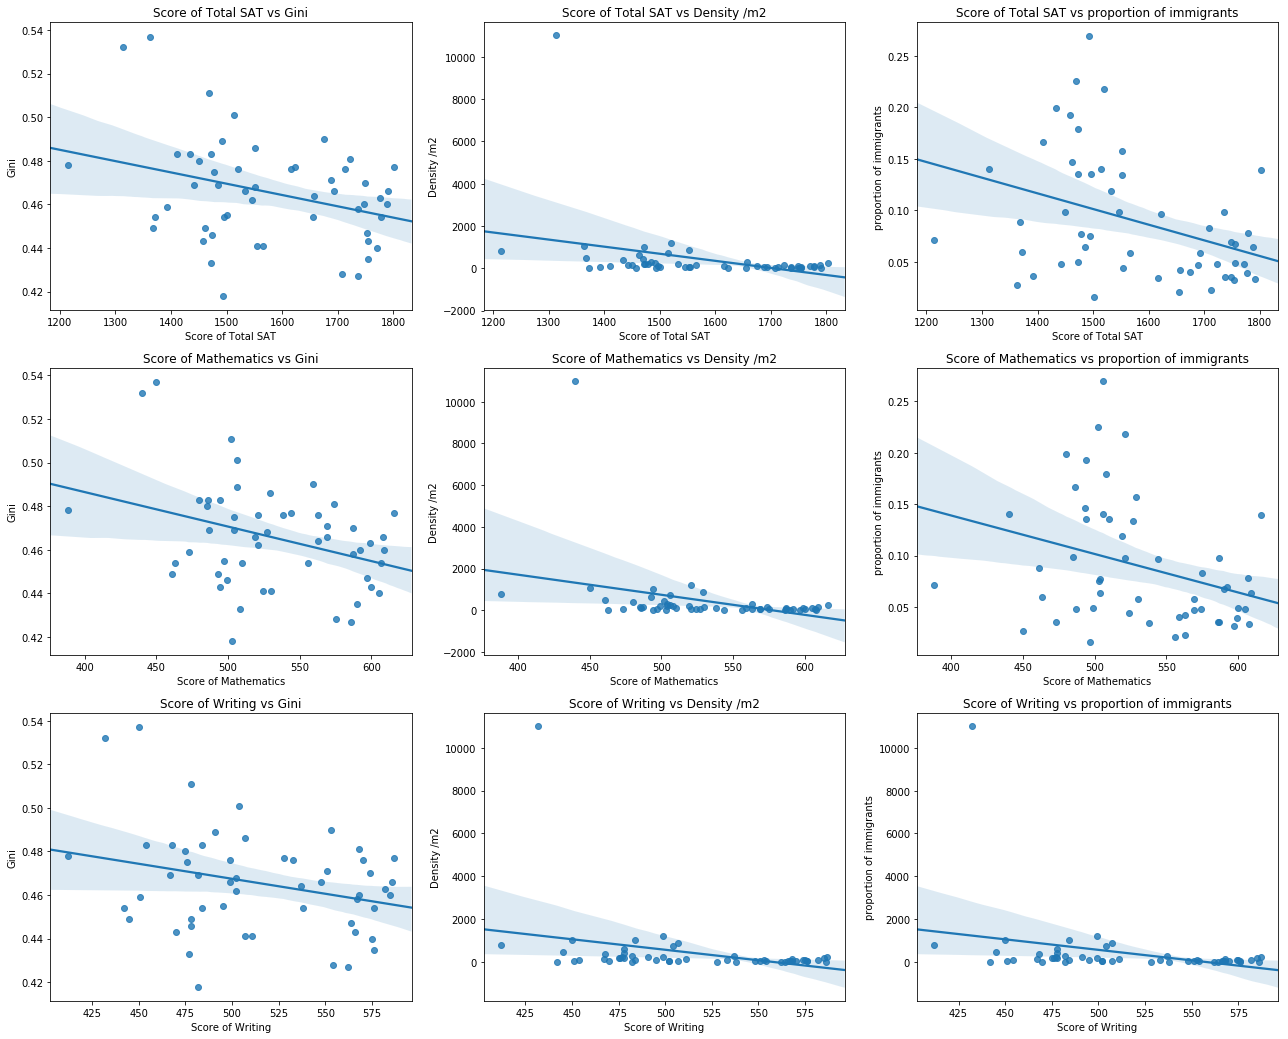

In [44]:
# Generamos subsets con los datos que nos interesa analizar
math = df.Mathe2015.values
wrt = df.Writing2015.values
scores = df.SATscore2015.values
density = df.density2015.values
gini= df.Gini2015.values
migr= df.INMprop2016.values

# Generamos el entorno de la figura
plt.figure(figsize=(22, 18))

# Dividimos el área en áreas de 2 filas x 3 columnas (grids) para generar distintas vistas de los datos

# Bloque superior
plt.subplot(3, 3, 1) # seleccionamos el #1
ax = sns.regplot(x=scores, y=gini, marker='o')
plt.xlabel('Score of Total SAT')
plt.ylabel('Gini')
plt.title('Score of Total SAT vs Gini')

plt.subplot(3, 3, 2) # seleccionamos el #2
ax = sns.regplot(x=scores, y=density, marker='o')
plt.xlabel('Score of Total SAT')
plt.ylabel('Density /m2')
plt.title('Score of Total SAT vs Density /m2')

plt.subplot(3, 3, 3) # seleccionamos el #3
ax = sns.regplot(x=scores, y=migr, marker='o')
plt.xlabel('Score of Total SAT')
plt.ylabel('proportion of immigrants')
plt.title('Score of Total SAT vs proportion of immigrants')

# Bloque centro
plt.subplot(3, 3, 4) # seleccionamos el #4
ax = sns.regplot(x=math, y=gini, marker='o')
plt.xlabel('Score of Mathematics')
plt.ylabel('Gini')
plt.title('Score of Mathematics vs Gini')

plt.subplot(3, 3, 5) # seleccionamos el #5
ax = sns.regplot(x=math, y=density, marker='o')
plt.xlabel('Score of Mathematics')
plt.ylabel('Density /m2')
plt.title('Score of Mathematics vs Density /m2')

plt.subplot(3, 3, 6) # seleccionamos el #6
ax = sns.regplot(x=math, y=migr, marker='o')
plt.xlabel('Score of Mathematics')
plt.ylabel('proportion of immigrants')
plt.title('Score of Mathematics vs proportion of immigrants')

# Bloque inferior
plt.subplot(3, 3, 7) # seleccionamos el #7
ax = sns.regplot(x=wrt, y=gini, marker='o')
plt.xlabel('Score of Writing')
plt.ylabel('Gini')
plt.title('Score of Writing vs Gini')

plt.subplot(3, 3, 8) # seleccionamos el #8
ax = sns.regplot(x=wrt, y=density, marker='o')
plt.xlabel('Score of Writing')
plt.ylabel('Density /m2')
plt.title('Score of Writing vs Density /m2')

plt.subplot(3, 3, 9) # seleccionamos el #9
ax = sns.regplot(x=wrt, y=density, marker='o')
plt.xlabel('Score of Writing')
plt.ylabel('proportion of immigrants')
plt.title('Score of Writing vs proportion of immigrants')

plt.show()

### 23. ¿Hay alguna relación interesante para mencionar? ¿Cuál? ¿Qué tipo de relación es?

In [45]:
# Para el análisis basado en modelo de regresion lineal OLS
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as sm

df_data3 = pd.read_csv('C:/Users/gonza/Desktop/Desafio 1/Data/df.csv', usecols=['State','Mathe2015','Writing2015','SATscore2015','GDP2016','Gini2015','density2015','pop2015','INMprop2016','PerCapPersIncome2010','INSTITUTIONS'])
df_data3
# Realizaremos una regresion por OLS
result = sm.ols(formula="INSTITUTIONS ~ GDP2016 + INMprop2016", data=df_data3).fit()
print(result.params)
print(result.summary())

Intercept       54.076895
GDP2016          0.000471
INMprop2016   -465.309515
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           INSTITUTIONS   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     360.9
Date:                Mon, 19 Feb 2018   Prob (F-statistic):           1.94e-30
Time:                        19:06:45   Log-Likelihood:                -284.16
No. Observations:                  53   AIC:                             574.3
Df Residuals:                      50   BIC:                             580.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

El modelo nos explica la relación entre el número de instituciones y las variables independientes  (GDP e inmigración), 
mostrando una relación lineal estimada que se ajusta con un valor de 93.3% .  El modelo intenta predecir cual es el estado que reuna las mejores condiciones.   

### 24. Creá boxplots para cada variable (según corresponda)

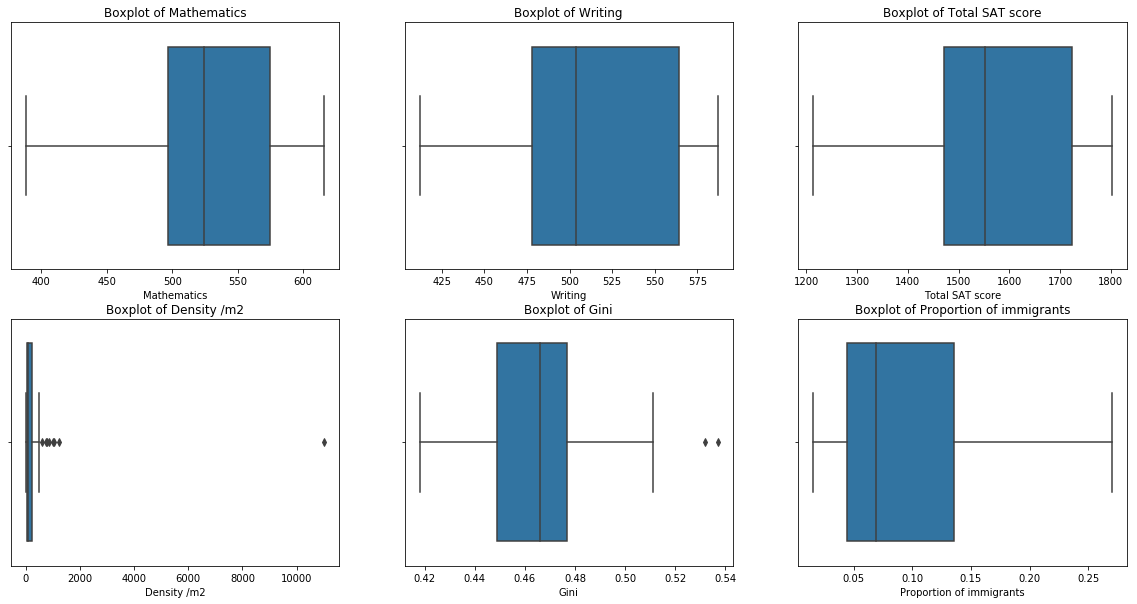

In [46]:
# Generamos el entorno de la figura
plt.figure(figsize=(20, 10))

# Dividimos el área en áreas de 2 filas x 3 columnas (grids) para generar distintas vistas de los datos

# Bloque superior
plt.subplot(2, 3, 1) # seleccionamos el #1
ax = sns.boxplot(x='Mathe2015',data=df)
plt.xlabel('Mathematics')
plt.title('Boxplot of Mathematics')

plt.subplot(2, 3, 2) # seleccionamos el #2
ax = sns.boxplot(x='Writing2015',data=df)
plt.xlabel('Writing')
plt.title('Boxplot of Writing')

plt.subplot(2, 3, 3) # seleccionamos el #3
ax = sns.boxplot(x='SATscore2015',data=df)
plt.xlabel('Total SAT score')
plt.title('Boxplot of Total SAT score')

# Bloque inferior
plt.subplot(2, 3, 4) # seleccionamos el #4
ax = sns.boxplot(x='density2015',data=df)
plt.xlabel('Density /m2')
plt.title('Boxplot of Density /m2')

plt.subplot(2, 3, 5) # seleccionamos el #5
ax = sns.boxplot(x='Gini2015',data=df)
plt.xlabel('Gini')
plt.title('Boxplot of Gini')

plt.subplot(2, 3, 6) # seleccionamos el #6
ax = sns.boxplot(x='INMprop2016',data=df)
plt.xlabel('Proportion of immigrants')
plt.title('Boxplot of Proportion of immigrants')

plt.show()                               